In [33]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
df = pl.read_parquet("../data/combined-2022-xgboost-synthetic-eiu.parquet")
pd_df = df.to_pandas()

In [34]:
EI = ["in_math99", "arwu_ranked_num", "imo_total_score"]

In [35]:
pisa_df = pd_df[pd_df["year"].isin([2003, 2006, 2009, 2012, 2015, 2018, 2022]) & (pd_df["math"].notnull())]

In [36]:
nosynth = pl.read_parquet("../data/combined-2022-included.parquet").to_pandas()

In [37]:
pisa_df[EI + ["population", "gdp_pc_growth", "math"]].corr()

,in_math99,arwu_ranked_num,imo_total_score,population,gdp_pc_growth,math
in_math99,1.000000,0.364180,0.254865,-0.095196,-0.124631,0.641199
arwu_ranked_num,0.364180,1.000000,-0.013410,-0.102838,-0.161266,0.559003
imo_total_score,0.254865,-0.013410,1.000000,0.287839,0.058242,0.202928
population,-0.095196,-0.102838,0.287839,1.000000,0.008133,-0.128044
gdp_pc_growth,-0.124631,-0.161266,0.058242,0.008133,1.000000,-0.120045
math,0.641199,0.559003,0.202928,-0.128044,-0.120045,1.000000


In [38]:
pisa_df[pisa_df["country"] == "SGP"]

,country,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu,xg_primary_completion,xg_lower_sec_completion,xg_upper_sec_completion
3426,SGP,2009,38926.805437,-284.677195,79.175751,74.796913,63.178131,4987573.0,0.400997,0.0,558.970681,523.271872,538.270388,8.416997,7.521498,5.894869,83.273895,75.498466,60.470074
3429,SGP,2012,55547.555308,190.446224,84.396889,77.391113,67.704842,5312437.0,0.376475,0.0,568.359669,537.372245,546.697052,9.501632,9.944748,5.880000,84.514091,76.924461,68.315620
3432,SGP,2015,55645.606861,176.232469,86.696228,79.368248,70.917091,5535002.0,0.361337,0.0,556.188601,525.314189,546.385640,8.134937,8.952377,6.140000,87.674484,79.609673,69.864441
3435,SGP,2018,66836.521995,309.007522,87.908798,81.423561,73.523788,5638676.0,0.266020,53.0,566.049321,548.583819,548.876010,7.548339,11.257523,6.380000,88.693756,83.054367,73.927147
3439,SGP,2022,82807.629062,27.379756,89.474487,83.687050,72.495079,5637022.0,0.266098,56.2,574.663820,NaN,NaN,14.639147,10.614437,6.220000,89.474487,83.687050,72.495079


In [39]:
nosynth[nosynth["country"] == "SGP"]

,country,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu
3420,SGP,2003,23730.384005,6.101276,NaN,NaN,NaN,4114826.0,2,0.0,NaN,NaN,NaN,NaN,71.0,NaN
3421,SGP,2004,27608.080013,8.572205,NaN,NaN,NaN,4166664.0,2,0.0,NaN,NaN,NaN,NaN,139.0,NaN
3422,SGP,2005,29961.317281,4.872093,82.364014,70.768784,59.384510,4265762.0,2,0.0,NaN,NaN,NaN,NaN,145.0,NaN
3423,SGP,2006,33768.452823,5.648343,77.816994,71.879929,58.747822,4401365.0,2,0.0,NaN,NaN,NaN,NaN,100.0,5.89
3424,SGP,2007,39432.886020,4.572986,78.105469,73.011719,59.646259,4588599.0,2,0.0,NaN,NaN,NaN,NaN,87.0,NaN
3425,SGP,2008,40008.572049,-3.415493,79.229134,74.948799,63.172771,4839396.0,2,0.0,NaN,NaN,NaN,NaN,98.0,5.89
3426,SGP,2009,38926.805437,-2.846772,79.175751,74.796913,63.178131,4987573.0,2,0.0,558.970681,523.271872,538.270388,8.416997,116.0,NaN
3427,SGP,2010,47236.683085,12.508522,83.609177,76.198341,65.521057,5076732.0,2,0.0,NaN,NaN,NaN,NaN,117.0,5.89
3428,SGP,2011,53891.457026,4.023382,83.690102,76.699593,66.569313,5183688.0,2,0.0,NaN,NaN,NaN,NaN,179.0,5.89
3429,SGP,2012,55547.555308,1.904462,84.396889,77.391113,67.704842,5312437.0,2,0.0,568.359669,537.372245,546.697052,9.501632,154.0,5.88


In [40]:
pisa_df[pisa_df["country"] == "CHE"]

,country,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu,xg_primary_completion,xg_lower_sec_completion,xg_upper_sec_completion
3760,CHE,2003,49335.745629,-77.133317,76.701653,90.914566,83.545250,7339001.0,1.090067,106.8,518.084311,491.542689,502.690374,2.434407,0.0,9.061389,76.701653,90.914566,83.545250
3763,CHE,2006,59011.032459,342.255066,99.378838,93.444351,82.325966,7483934.0,1.068957,97.5,527.780762,496.207707,507.625144,2.572933,0.0,9.020000,99.378838,93.444351,82.325966
3766,CHE,2009,71568.312389,-351.055886,100.394585,95.920631,82.715378,7743831.0,1.033080,100.1,529.501415,494.709859,508.755190,3.781288,0.0,8.998219,100.394585,95.345261,79.902870
3769,CHE,2012,85836.207677,11.059660,100.039085,96.276581,82.481552,7996861.0,0.875343,127.3,520.672206,497.243059,503.114019,2.433012,0.0,9.090000,100.039085,97.973831,81.602287
3772,CHE,2015,83806.447600,49.412982,99.691467,97.093933,85.190010,8282396.0,0.845166,128.1,517.856413,488.142943,501.660451,2.787551,0.0,9.090000,100.203796,99.222565,83.991516
3775,CHE,2018,85217.369151,210.552472,99.674652,97.085258,85.681770,8514329.0,0.587245,160.0,516.670056,484.508564,495.080662,2.281001,0.0,9.030000,100.571175,99.082085,84.985748
3779,CHE,2022,93259.905718,173.600130,101.685051,101.448990,81.760437,8775760.0,0.512776,134.5,507.990586,NaN,NaN,2.669048,0.0,9.140000,101.685051,101.448990,81.760437


In [41]:
stdev = pisa_df.groupby("country").std().reset_index()

In [42]:
mean = pisa_df.groupby("country").mean().reset_index()

In [43]:
stdev[EI].describe()

,in_math99,arwu_ranked_num,imo_total_score
count,76.000000,76.000000,76.000000
mean,0.298222,0.083562,1.267671
std,0.459545,0.128747,0.914405
min,0.000000,0.000000,0.000000
25%,0.029387,0.000000,0.604083
50%,0.141307,0.034154,1.401376
75%,0.374750,0.106813,1.785410
max,2.878640,0.726280,4.491720


In [44]:
mean[EI].describe()

,in_math99,arwu_ranked_num,imo_total_score
count,89.000000,89.000000,89.000000
mean,0.743303,0.187082,4.395472
std,1.323319,0.276629,3.391053
min,0.000000,0.000000,0.000000
25%,0.014825,0.000000,0.667639
50%,0.331438,0.025843,4.953895
75%,0.974770,0.304732,7.298609
max,9.648210,1.006767,10.772132


In [45]:
cov = stdev[EI] / mean[EI]

In [46]:
stdev.shape, cov.shape, mean.shape

((89, 19), (89, 3), (89, 19))

In [47]:
cov_country = pd.concat([stdev["country"], cov], axis=1)

In [48]:
cov_country.describe()

,in_math99,arwu_ranked_num,imo_total_score
count,70.000000,55.000000,61.000000
mean,0.629124,0.798512,0.363419
std,0.517636,0.769075,0.295342
min,0.095533,0.075374,0.042775
25%,0.299716,0.220882,0.199637
50%,0.459159,0.358783,0.282656
75%,0.732451,1.549269,0.418386
max,2.449490,2.645751,1.732051


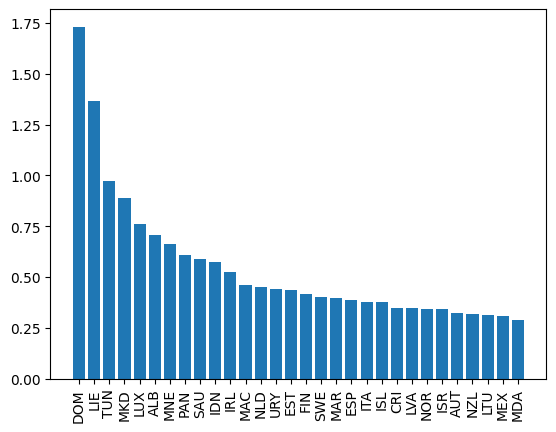

In [49]:
stdev_sorted = cov_country.sort_values("imo_total_score", ascending=False).head(30)
fig = plt.figure()
plt.xticks(rotation=90)
plt.bar(stdev_sorted["country"], stdev_sorted["imo_total_score"])
plt.show()

<BarContainer object of 30 artists>

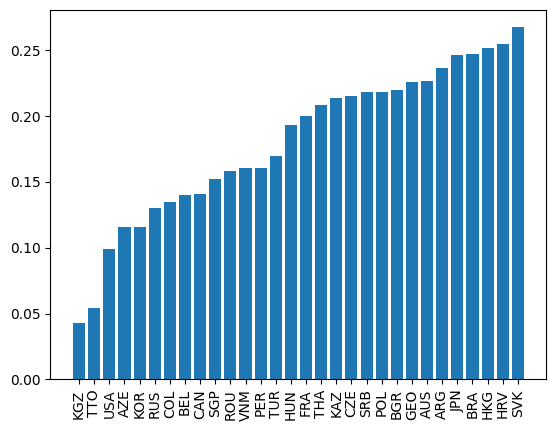

In [50]:
stdev_sorted = cov_country[cov_country["imo_total_score"] > 0].sort_values("imo_total_score", ascending=True).head(30)
plt.xticks(rotation=90)
plt.bar(stdev_sorted["country"], stdev_sorted["imo_total_score"])

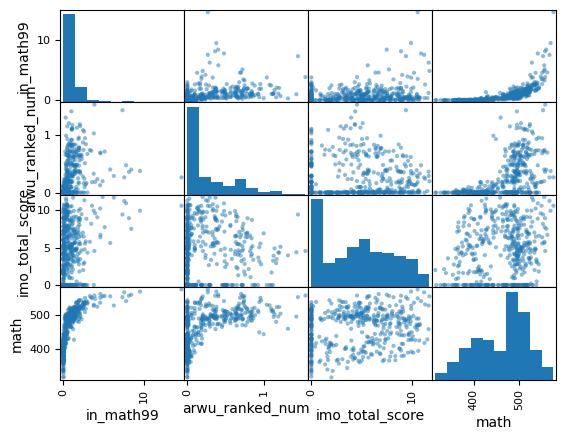

In [51]:
pd.plotting.scatter_matrix(pisa_df[EI + ["math"]], alpha=0.5)
plt.savefig("total.png")

In [52]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

In [53]:
X = pisa_df[["in_math99", "arwu_ranked_num", "imo_total_score"]]

In [54]:
transformer = PCA(n_components=3)

In [55]:
transformer.fit(X).components_.T

array([[ 1.26141616e-01,  9.87520997e-01,  9.42898334e-02],
       [ 5.64901856e-04,  9.49775405e-02, -9.95479255e-01],
       [ 9.92012083e-01, -1.25624627e-01, -1.14227680e-02]])

In [57]:
transformer.explained_variance_ratio_

array([0.85589486, 0.1375166 , 0.00658853])

In [24]:
PCA(n_components="mle").fit(pisa_df[["in_math99", "arwu_ranked_num", "imo_total_score", "math", "gdp_pc", "primary_completion", "lower_sec_completion", "upper_sec_completion", "population", "democracy_eiu"]]).components_.T

array([[-2.33600420e-09,  2.18414123e-05, -1.46826533e-02,
        -1.42822431e-02,  4.48713936e-02, -3.11084360e-02,
        -9.99500176e-02,  2.72506626e-01,  9.54877120e-01],
       [-5.78628527e-10,  7.02884934e-06, -2.26449511e-03,
         1.41570501e-03, -1.66979353e-03, -4.24551142e-03,
         9.93884286e-03, -4.92671903e-02,  3.97378692e-02],
       [ 1.68840498e-08, -1.37288941e-05, -2.64407591e-02,
         3.79275341e-02,  1.03192603e-01,  1.79570356e-02,
        -9.83646279e-01, -1.17986463e-01, -7.32195087e-02],
       [-1.21119752e-07,  1.16943166e-03, -9.59828503e-01,
        -2.75478907e-01,  3.98037136e-02, -1.97869135e-02,
         1.98831356e-02,  5.49911142e-03, -2.09046572e-02],
       [-4.65296089e-05,  9.99999218e-01,  1.24515474e-03,
        -9.32369750e-05,  1.47974469e-05, -2.86813020e-06,
        -4.98096196e-05,  1.11680168e-05, -1.43724233e-05],
       [-3.49189862e-08,  1.72427009e-04, -1.13411681e-01,
         2.39813233e-01, -7.33504409e-01,  6.163964

In [25]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [26]:
variables = ["in_math99", "imo_total_score", "arwu_ranked_num"]
regs = []
for v in variables:
    r = smf.ols(f"{v} ~ country", pisa_df).fit()
    regs.append(r)

In [27]:
s = Stargazer(regs)
s.covariate_order([])


In [28]:
s.custom_columns(variables, [1, 1, 1])
s.show_model_numbers(False)
s

In [31]:
print(s.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
\\[-1.8ex] & \multicolumn{1}{c}{in_math99} & \multicolumn{1}{c}{imo_total_score} & \multicolumn{1}{c}{arwu_ranked_num}  \\
\hline \\[-1.8ex]
\hline \\[-1.8ex]
 Observations & 441 & 441 & 441 \\
 $R^2$ & 0.877 & 0.845 & 0.791 \\
 Adjusted $R^2$ & 0.846 & 0.807 & 0.738 \\
 Residual Std. Error & 0.573 (df=352) & 1.533 (df=352) & 0.171 (df=352) \\
 F Statistic & 28.437$^{***}$ (df=88; 352) & 21.875$^{***}$ (df=88; 352) & 15.096$^{***}$ (df=88; 352) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{3}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


In [29]:
pisa_df[(pisa_df["year"] == 2009) & (pisa_df["country"] == "USA")]

,country,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu,xg_primary_completion,xg_lower_sec_completion,xg_upper_sec_completion
4126,USA,2009,47194.943355,-345.001592,98.594177,94.535217,86.709084,306771529.0,0.495483,2198.8,485.637508,497.591875,499.626656,0.340298,9.313458,8.151012,98.108292,88.263832,77.59024


In [30]:
pisa_df[(pisa_df["year"] == 2009)].describe()

,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu,xg_primary_completion,xg_lower_sec_completion,xg_upper_sec_completion
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2009.0,26271.548909,-352.562351,90.897517,76.757813,60.693946,3.125018e+07,0.241311,52.624638,460.171133,458.488891,465.122063,0.877577,4.646397,7.233129,90.887497,77.733643,60.867809
std,0.0,24945.202661,432.758489,9.459484,18.157017,19.181939,5.630183e+07,0.348133,268.954222,57.071533,50.716865,54.496433,1.369421,3.535839,1.694904,8.782939,15.377412,16.759354
min,2009.0,871.224227,-1714.539390,65.690002,36.431381,24.055031,3.567500e+04,0.000000,0.000000,335.060479,318.697555,333.114561,0.000000,0.000000,2.667462,66.804840,46.844704,26.567726
25%,2009.0,7318.126410,-568.145234,83.370003,63.412270,45.204285,3.814419e+06,0.000000,0.000000,411.572974,417.955036,420.006680,0.046352,1.667323,6.419902,84.188683,66.758530,48.586922
50%,2009.0,16597.208458,-344.334281,94.625443,79.977600,64.227272,7.992644e+06,0.009005,0.000000,476.853500,475.612529,486.707293,0.382971,4.352280,7.443382,94.706276,83.519196,64.984474
75%,2009.0,41301.273220,-110.570020,98.594177,92.578217,76.957077,3.362890e+07,0.488387,0.000000,499.413869,497.591875,509.206853,1.176051,8.019670,8.210844,97.313019,90.191010,74.723602
max,2009.0,126261.397283,705.060252,100.394585,99.789101,88.610489,3.067715e+08,1.182985,2198.800000,558.970681,540.979064,549.968216,8.416997,11.356388,9.791846,100.418510,98.726898,84.262253
